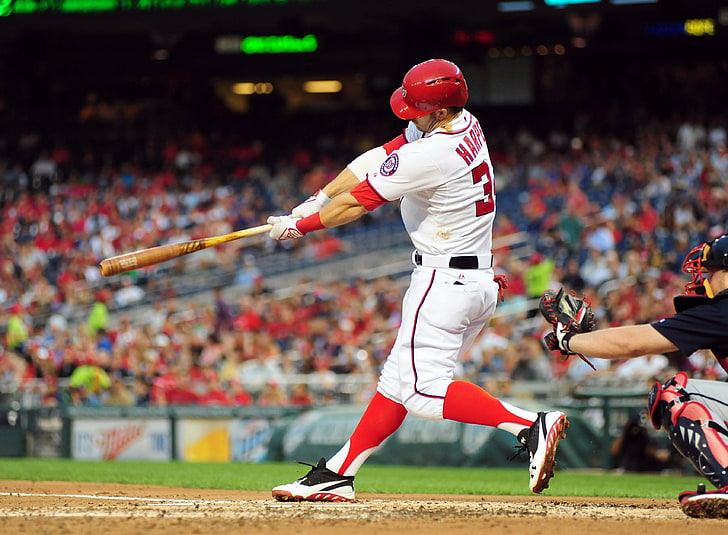

# BASEBALL PROJECT

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
bb=pd.read_csv('baseball_dataset.csv')
bb

,wins,runs,at bats,hits,doubles,triples,home runs,base on balls,strike outs,stolen bases,runs allowed,earned runs,earn run average,complete games,shutouts,saves,errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
# shape of baseball dataset
bb.shape

(30, 17)

In [6]:
bb.keys()

Index(['wins', 'runs', 'at bats', 'hits', 'doubles', 'triples', 'home runs',
       'base on balls', 'strike outs', 'stolen bases', 'runs allowed',
       'earned runs', 'earn run average', 'complete games', 'shutouts',
       'saves', 'errors'],
      dtype='object')

In [7]:
bb.describe()

,wins,runs,at bats,hits,doubles,triples,home runs,base on balls,strike outs,stolen bases,runs allowed,earned runs,earn run average,complete games,shutouts,saves,errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


 OBSERVATIONS

-> THER ARE NO LARGER DIFFERNECE IN MEAN AND MEDIAN
->THERE IS A DIFFERENCE BETWEEN 75% AND MAXIMUM VALUES AT STOLEN BASES

In [8]:
#lets see dtypes of each coulmns
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wins              30 non-null     int64  
 1   runs              30 non-null     int64  
 2   at bats           30 non-null     int64  
 3   hits              30 non-null     int64  
 4   doubles           30 non-null     int64  
 5   triples           30 non-null     int64  
 6   home runs         30 non-null     int64  
 7   base on balls     30 non-null     int64  
 8   strike outs       30 non-null     int64  
 9   stolen bases      30 non-null     int64  
 10  runs allowed      30 non-null     int64  
 11  earned runs       30 non-null     int64  
 12  earn run average  30 non-null     float64
 13  complete games    30 non-null     int64  
 14  shutouts          30 non-null     int64  
 15  saves             30 non-null     int64  
 16  errors            30 non-null     int64  
dtyp

In [9]:
# lets see isnull or missing values
bb.isnull().sum()

wins                0
runs                0
at bats             0
hits                0
doubles             0
triples             0
home runs           0
base on balls       0
strike outs         0
stolen bases        0
runs allowed        0
earned runs         0
earn run average    0
complete games      0
shutouts            0
saves               0
errors              0
dtype: int64

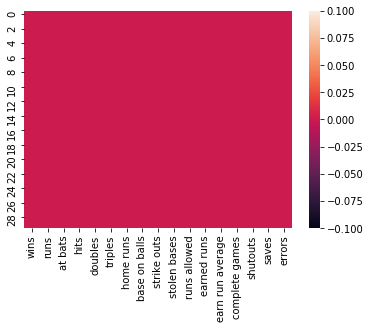

In [10]:
sns.heatmap(bb.isnull())

THERE ARE NO ISNULL VALUES AND MISSING VALUES SO WE CAN PROCEED FURTHER

In [11]:
#lets check correlation
bb_cor=bb.corr()
bb_cor

,wins,runs,at bats,hits,doubles,triples,home runs,base on balls,strike outs,stolen bases,runs allowed,earned runs,earn run average,complete games,shutouts,saves,errors
wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
at bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
home runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
base on balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
strike outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
stolen bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


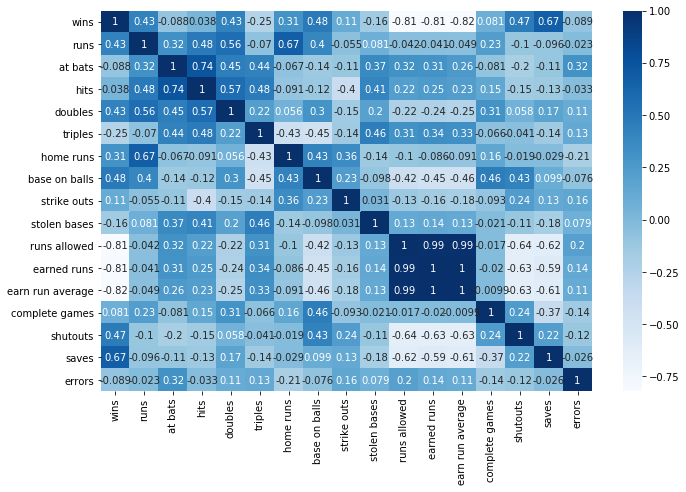

In [12]:
#using heatmap see the correlation of variables
plt.figure(figsize=(11,7))
sns.heatmap(bb_cor,cmap='Blues',annot=True)

->darker shades are highly correlated
->where has lighter shades are low correlation
-> runs allowed and earn run average are highly correlated whereas runs allowed and earned runs are highly correlated
-> wins and runs allowed are negatively correlated same has to earned runs and earn run average

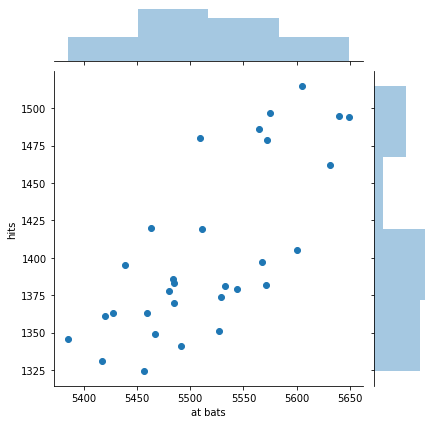

In [13]:
sns.jointplot(x='at bats',y='hits',data=bb)

In [14]:
# as you see the bat hits and number of hits are positively correlated

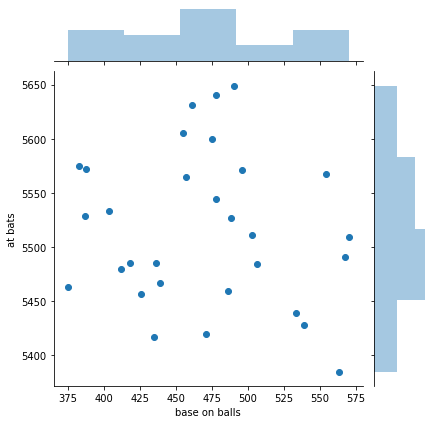

In [15]:
sns.jointplot(x='base on balls',y='at bats',data=bb)

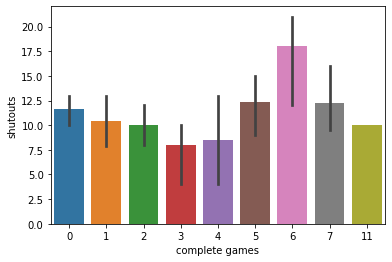

In [16]:
sns.barplot(x='complete games',y='shutouts',data=bb)

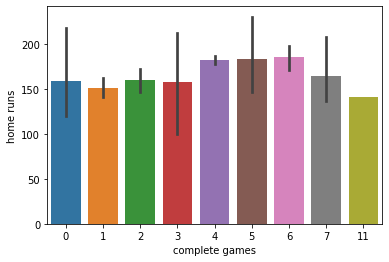

In [17]:
sns.barplot(x='complete games',y='home runs',data=bb)

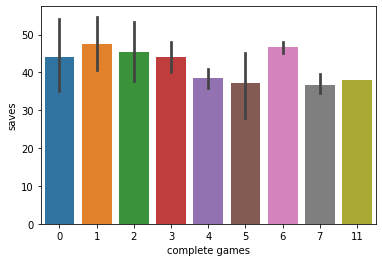

In [18]:
sns.barplot(x='complete games',y='saves',data=bb)

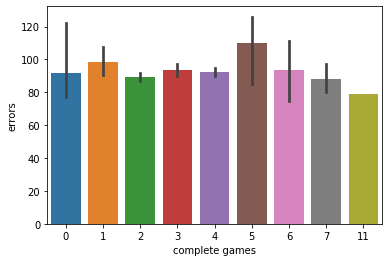

In [19]:
sns.barplot(x='complete games',y='errors',data=bb)

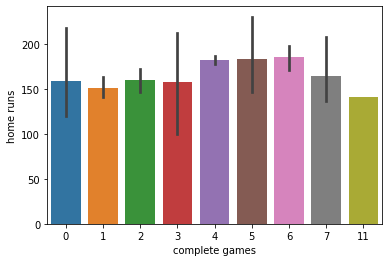

In [20]:
sns.barplot(x='complete games',y='home runs',data=bb)

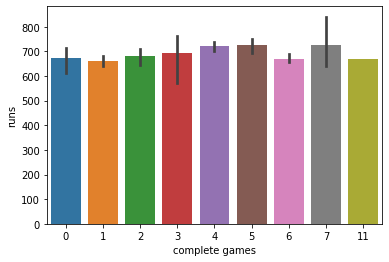

In [21]:
sns.barplot(x='complete games',y='runs',data=bb)

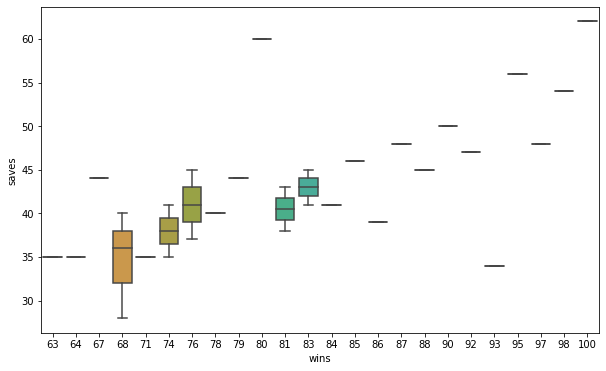

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='wins',y='saves',data=bb)

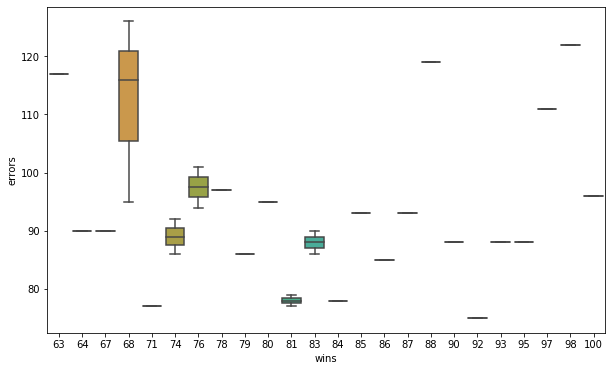

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='wins',y='errors',data=bb)

<Figure size 720x432 with 0 Axes>

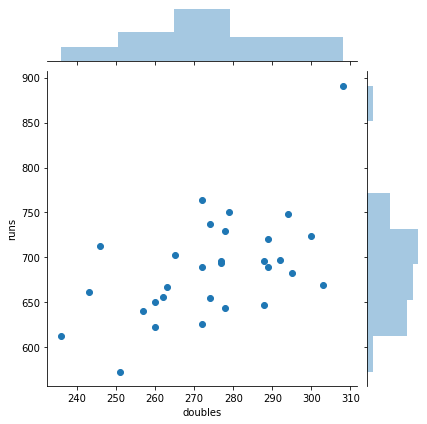

In [24]:
plt.figure(figsize=(10,6))
sns.jointplot(x='doubles',y='runs',data=bb,kind='scatter')

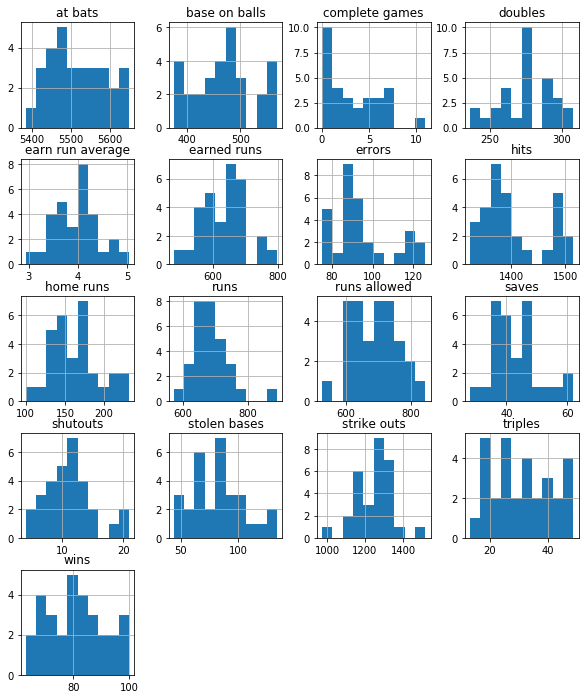

In [25]:
bb.hist(figsize=(10,12))
plt.show()

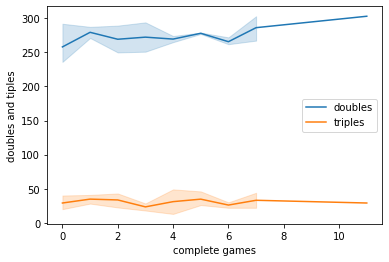

In [26]:
sns.lineplot(y='doubles',x='complete games',data=bb,label='doubles')
sns.lineplot(y='triples',x='complete games',data=bb,label='triples')
plt.ylabel('doubles and tiples')
plt.show()

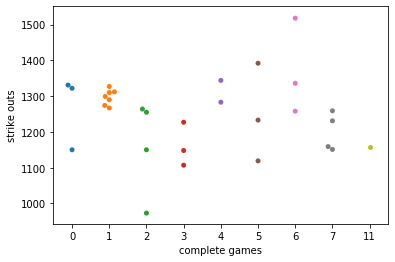

In [27]:
sns.swarmplot(y='strike outs',x='complete games',data=bb)
plt.show()

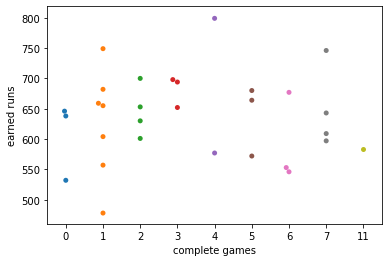

In [28]:
sns.swarmplot(y='earned runs',x='complete games',data=bb)
plt.show()

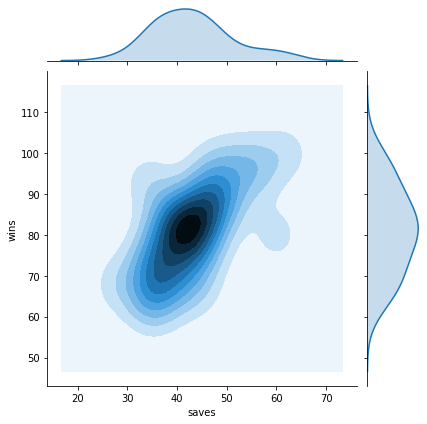

In [29]:
sns.jointplot(x='saves',y='wins',data=bb,kind='kde')

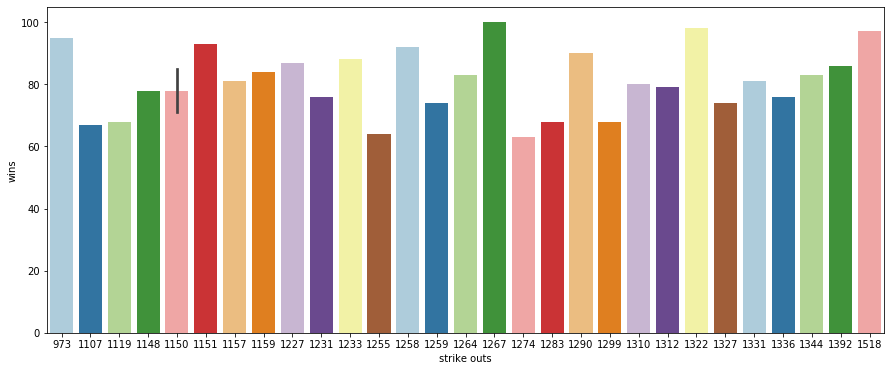

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x='strike outs',y='wins',data=bb,palette="Paired")

# TO CHECK OUTLIERS

In [31]:
bb.columns

Index(['wins', 'runs', 'at bats', 'hits', 'doubles', 'triples', 'home runs',
       'base on balls', 'strike outs', 'stolen bases', 'runs allowed',
       'earned runs', 'earn run average', 'complete games', 'shutouts',
       'saves', 'errors'],
      dtype='object')

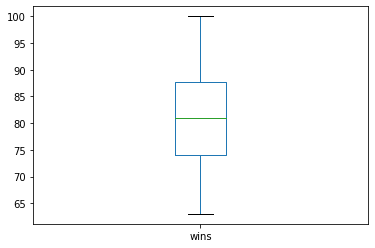

In [32]:
bb['wins'].plot.box()

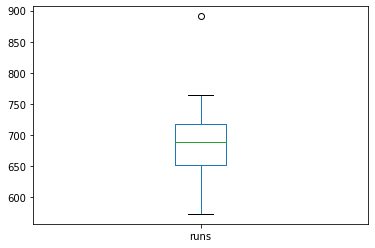

In [33]:
bb['runs'].plot.box()

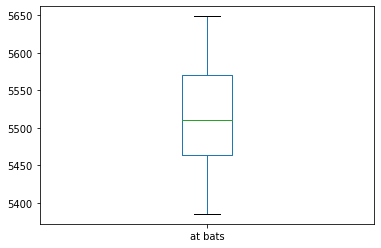

In [34]:
bb['at bats'].plot.box()

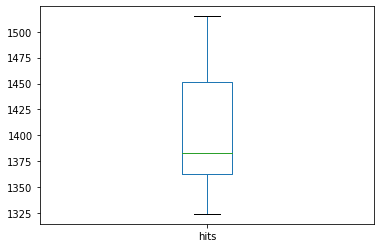

In [35]:
bb['hits'].plot.box()

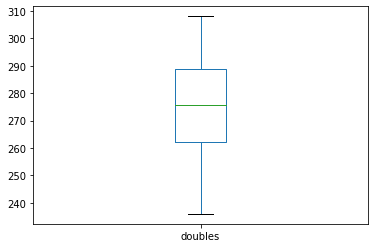

In [36]:
bb['doubles'].plot.box()

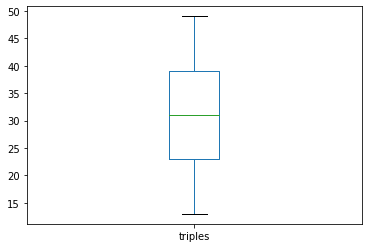

In [37]:
bb['triples'].plot.box()

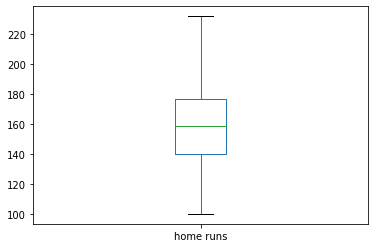

In [38]:
bb['home runs'].plot.box()

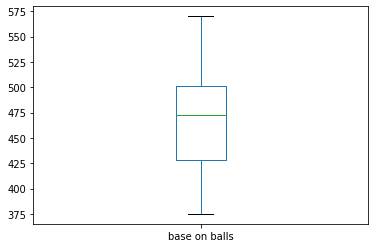

In [39]:
bb['base on balls'].plot.box()

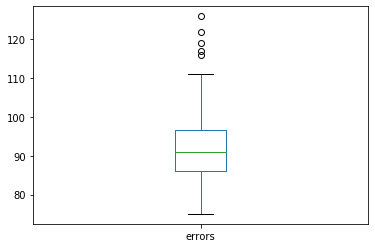

In [40]:
bb['errors'].plot.box()

In [41]:
#TO CHECK OUTLIERS AT ALL AT A TIME
collist=bb.columns.values
ncol=30
nrows=17

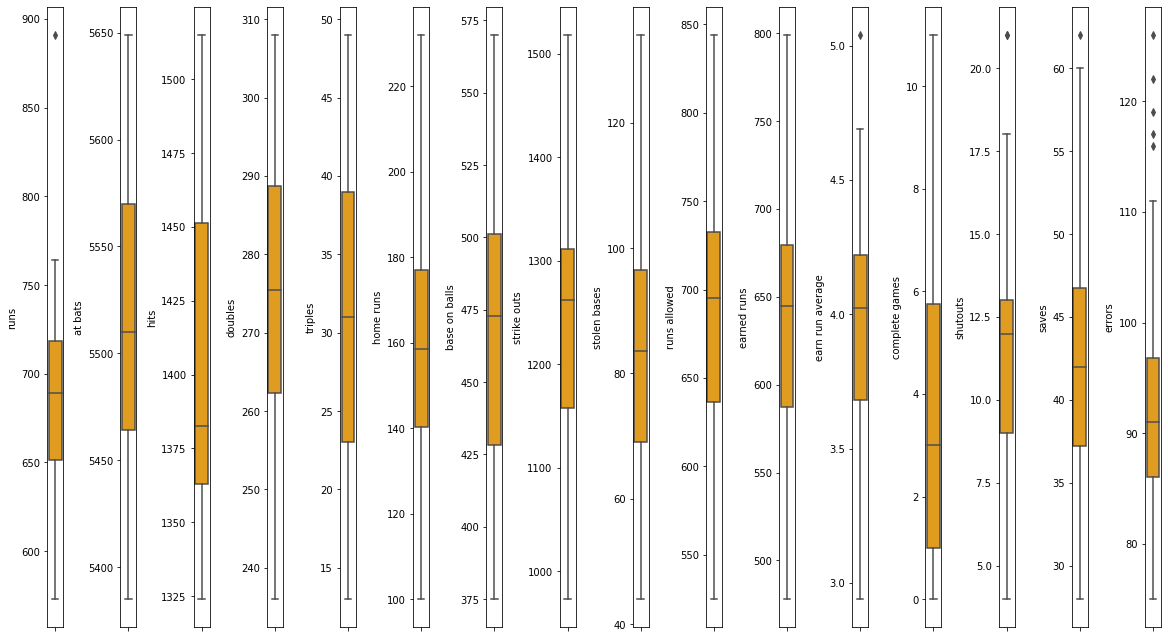

In [42]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(bb[collist[i]],color='orange',orient='v')
    plt.tight_layout()

# TO CHECK DISTRIBUTION OF SKEWNESS

In [43]:
bb.skew()

wins                0.047089
runs                1.200786
at bats             0.183437
hits                0.670254
doubles            -0.230650
triples             0.129502
home runs           0.516441
base on balls       0.158498
strike outs        -0.156065
stolen bases        0.479893
runs allowed        0.045734
earned runs         0.058710
earn run average    0.053331
complete games      0.736845
shutouts            0.565790
saves               0.657524
errors              0.890132
dtype: float64

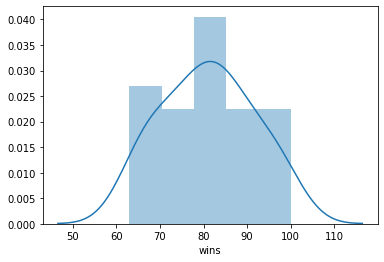

In [44]:
sns.distplot(bb['wins'])

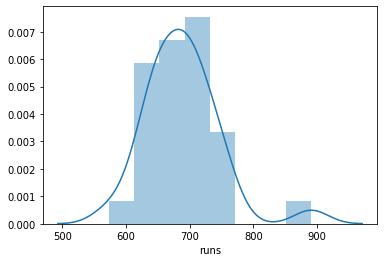

In [45]:
sns.distplot(bb['runs'])

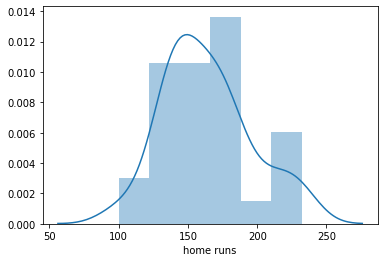

In [46]:
sns.distplot(bb['home runs'])

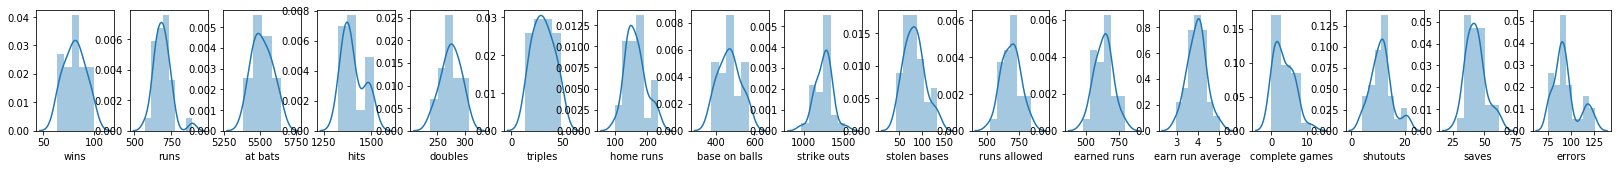

In [47]:
plt.figure(figsize=(50,45))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(bb[collist[i]])

In [48]:
# TO CHECK SKEWNESS ALL THE COLUMNS

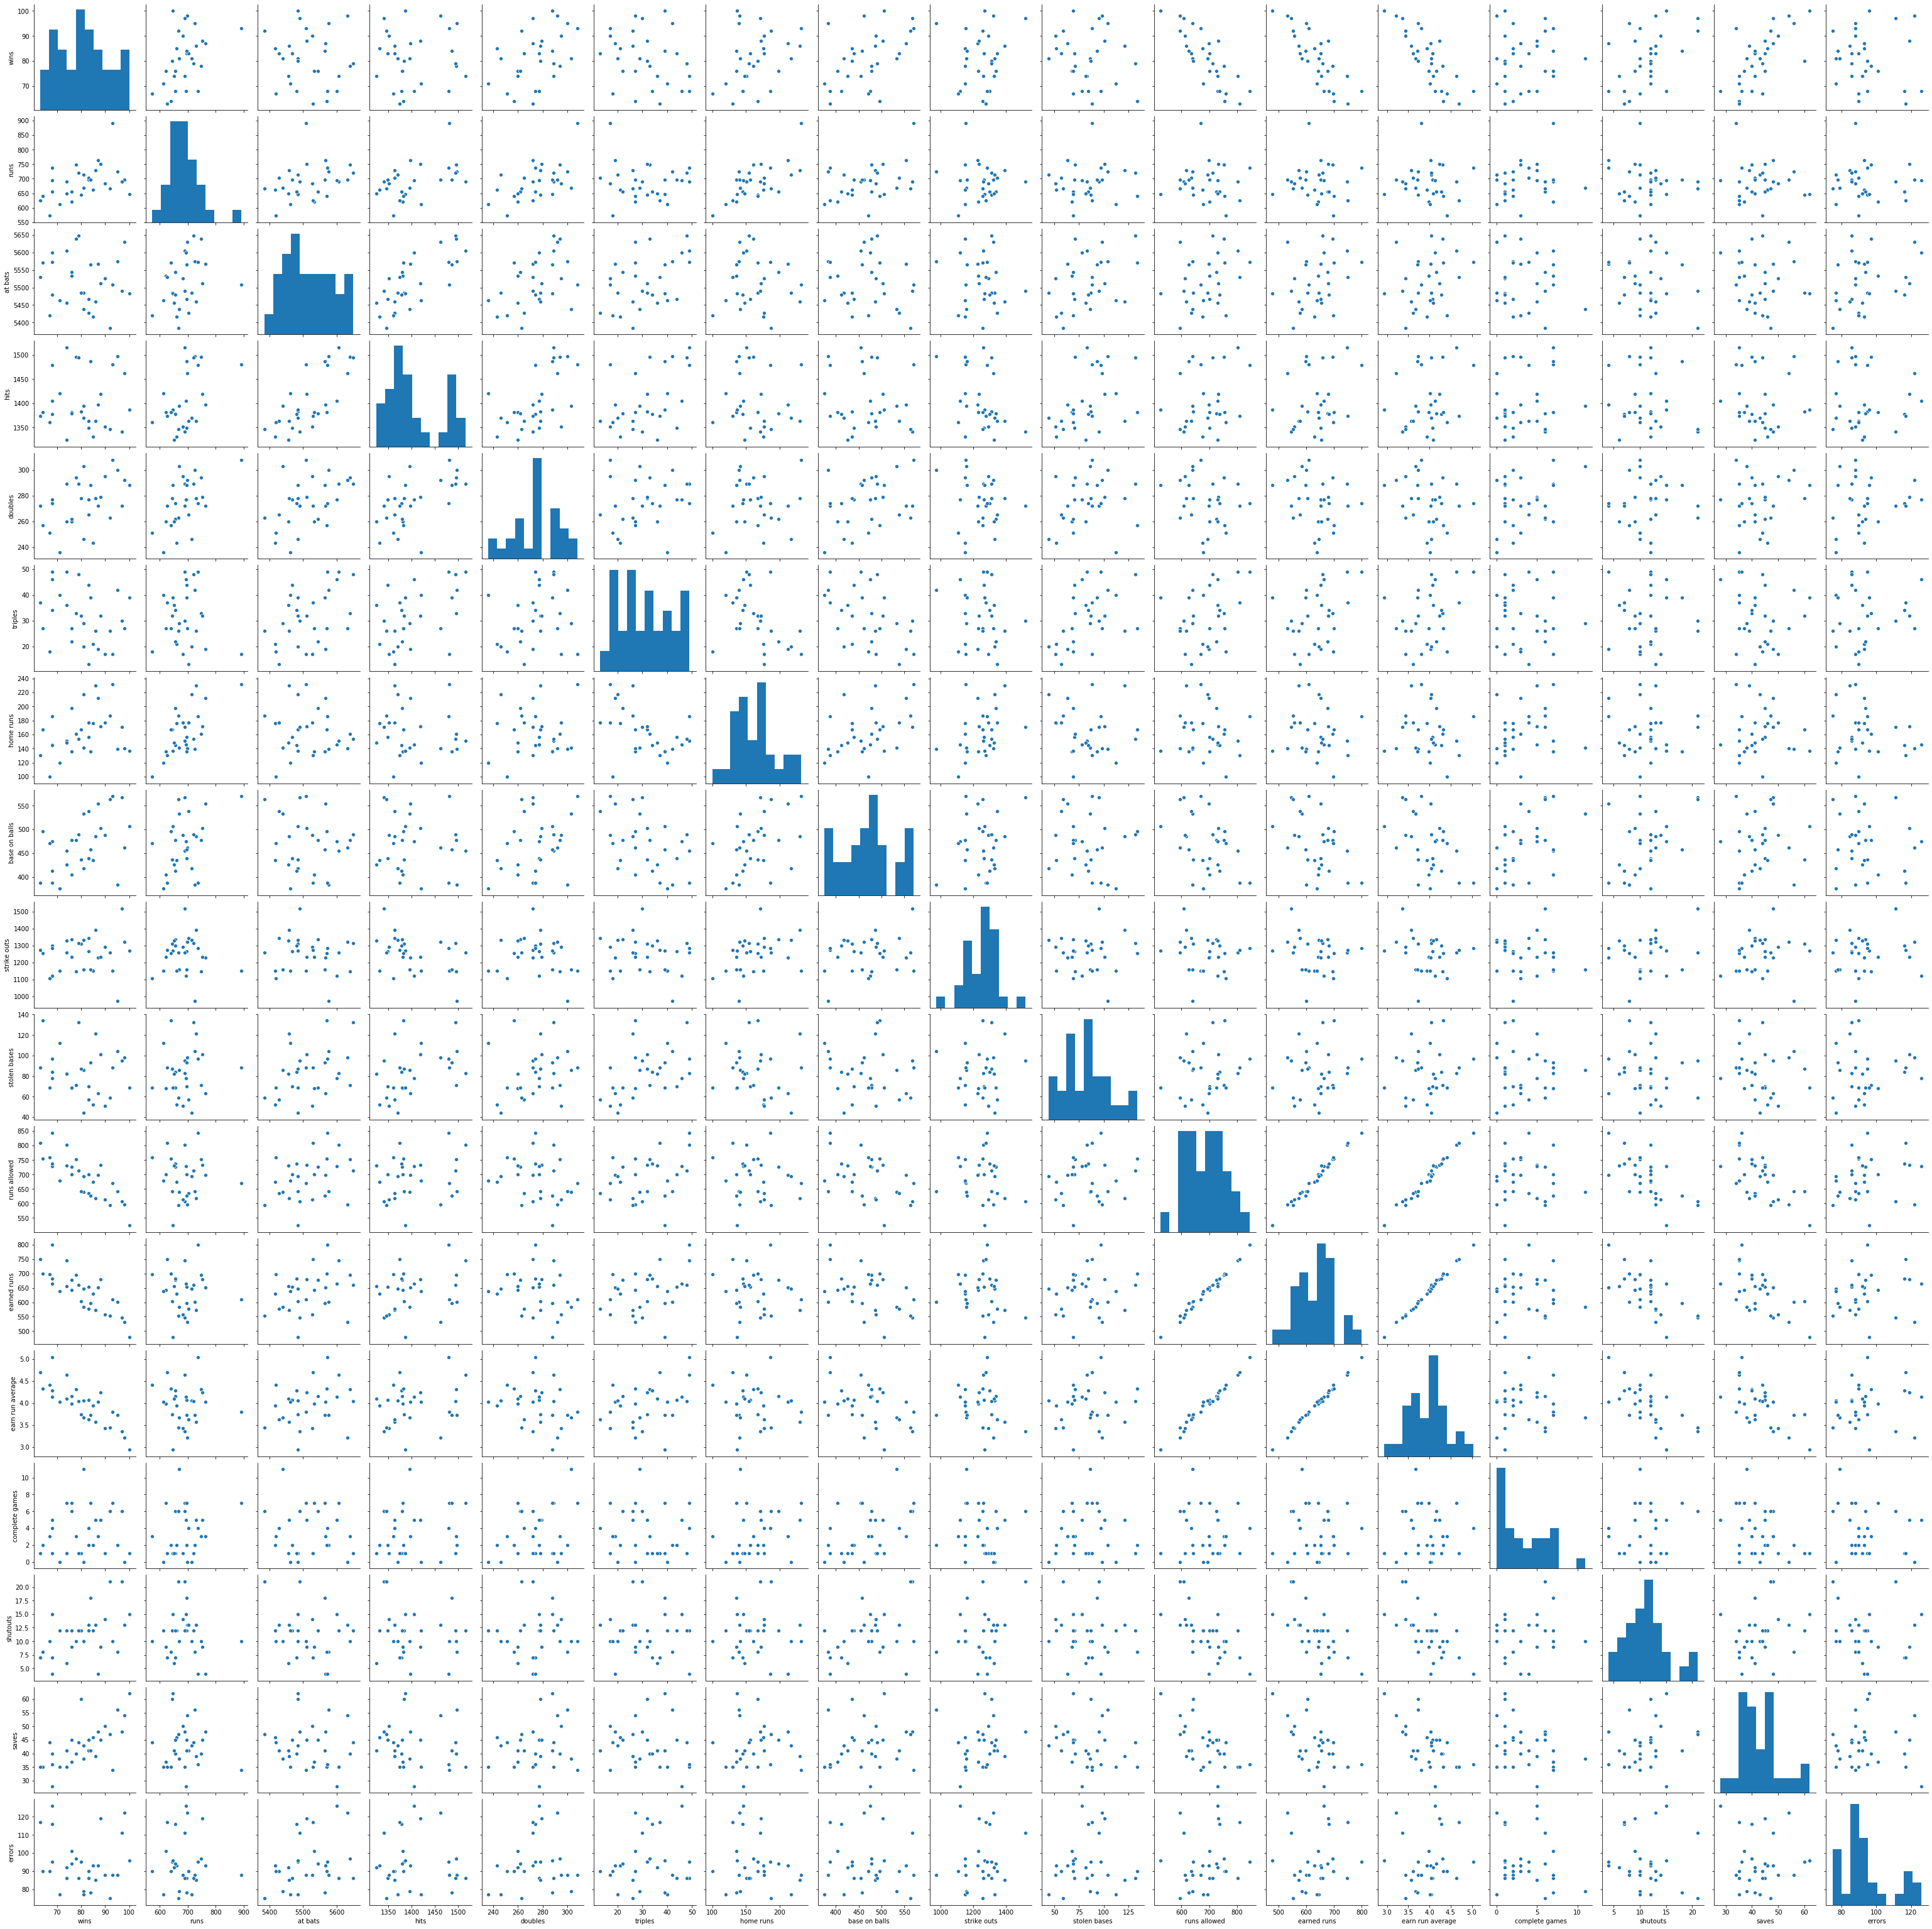

In [49]:
sns.pairplot(bb)

In [50]:
bb.head()

,wins,runs,at bats,hits,doubles,triples,home runs,base on balls,strike outs,stolen bases,runs allowed,earned runs,earn run average,complete games,shutouts,saves,errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [51]:
x=bb.drop(columns=['wins','complete games'])
x.head()

,runs,at bats,hits,doubles,triples,home runs,base on balls,strike outs,stolen bases,runs allowed,earned runs,earn run average,shutouts,saves,errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [52]:
y=pd.DataFrame(bb['wins'])
y.head()

,wins
0,95
1,83
2,81
3,76
4,74


In [53]:
# random state value with which our linear model learns maximum
max_r_score=0
for r_state in range (42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 scoring corresponding to',final_r_state,'is',max_r_score)

max r2 scoring corresponding to 162 is 0.9764790695202331


In [54]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(24, 15) (6, 15)
(24, 1) (6, 1)


In [55]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=6,scoring='r2')
a_score

array([ 0.22322007, -0.19434283, -0.79413068,  0.7717248 ,  0.69452936,
        0.04584329])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=162,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [57]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMSE: 2.2077272210922443
R2 score: 0.9764790695202331
MAE: 1.7580803617185883
MSE: 4.874059482751683


# PREDICTION

In [58]:
#predict the number of winning numbers
#predict the value
pred=lr.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [[60.53889719]
 [78.50625457]
 [66.04413949]
 [95.51349805]
 [86.02405149]
 [99.83718619]]
actual:     wins
24    63
9     78
23    67
16    98
20    90
15   100


In [59]:
t=np.array([840,5721,1205,180,45,127,397,1173,62,502,434,1.45,7,21,75])
t.shape

(15,)

In [60]:
t=t.reshape(1,-1)
t.shape

(1, 15)

In [61]:
lr.predict(t)

array([[196.81839981]])

# USING LASSO,RIDGE,ELASTIC REGRESSORS FOR OVERFITTING AND UNDERFITTING

In [62]:
from sklearn.linear_model import Lasso,Ridge

In [63]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8840344606838324

In [64]:
ls.coef_

array([ 0.10429009, -0.01544997,  0.01111028, -0.05710034, -0.00964966,
       -0.03712739,  0.00542449, -0.00472632, -0.01533898,  0.09564047,
       -0.14401195, -0.        ,  0.50389763,  0.64643456, -0.03311851])

In [65]:
# try to minimize the coefficient variance

rd=Ridge(alpha=0.001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8930151346655019

In [66]:
rd.coef_

array([[ 1.08781006e-01, -4.70302776e-02,  3.10405589e-02,
        -7.56661120e-02,  8.15672424e-02, -3.64717860e-02,
         3.57405206e-03, -1.76097193e-03, -3.50971099e-02,
         2.82976578e-02,  2.93250707e-01, -6.09390031e+01,
         2.56718639e-01,  4.79154943e-01,  4.82048745e-03]])

In [67]:
# elasticnet is a combination of both lasso and ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.8806435110832254


array([ 0.0974504 , -0.01466629,  0.0146053 , -0.05477524,  0.03070094,
       -0.03286795,  0.01127586, -0.00127699, -0.02789628,  0.02689549,
       -0.09013411, -0.        ,  0.28800387,  0.55770967, -0.0083537 ])

In [68]:
# THE HIGHER SCORE FOR OVERFITTING AND UNDERFITTING REGRESSORS ARE RIDGE REGRESSOR

# BAGGING AND BOOSTING

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=250,random_state=162)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))

0.6097944493297589


In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=250,random_state=162)
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(r2_score(y_test,gb_pred))

0.5461201829339242


In [71]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=250,random_state=162)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(r2_score(y_test,ad_pred))

0.5644591152815012


In [72]:
# THE BEST BAGGING AND BOOSTING REGRESSOR ARE RANDOM FOREST REGRESSOR

# SAVING FILE

In [73]:
from joblib import dump,load
dump(bb,'BASEBALL_WINS_PREDICTIONS.joblib')

['BASEBALL_WINS_PREDICTIONS.joblib']